In [1]:
# Mounting Google Drive to load data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading Kaggle MNIST data from drive

train = pd.read_csv('/content/drive/MyDrive/CV Batch - 9/mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/CV Batch - 9/mnist_test.csv')

train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Shuffeling training data
train_shuffled = shuffle(train.values, random_state=0)

# Extracting features as X and labels as y
X_train = train.drop(labels = ["label"],axis = 1)
y_train = train["label"]

# Loading test data (no labels are provieded)
X_test = test.drop(labels = ["label"],axis = 1)
y_test = test["label"]

print(f'X_train = {X_train.shape}, y = {y_train.shape}, X_test = {X_test.shape}')

TypeError: 'y_test' is an invalid keyword argument for print()

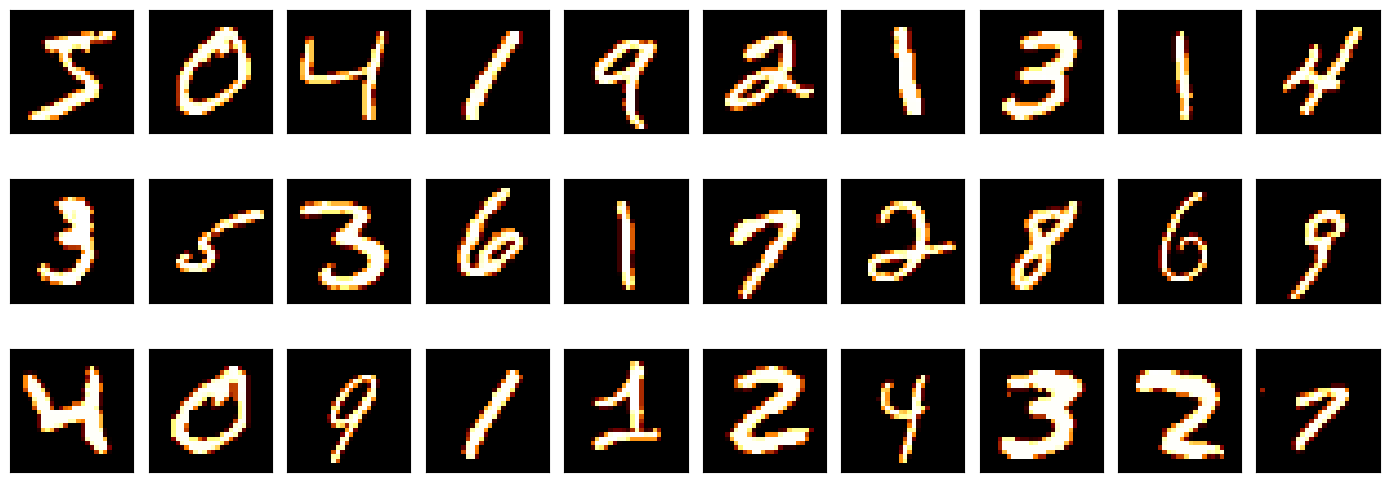

In [6]:
# Plotting some digits

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = X_train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

<ipython-input-7-7c4b6a06ea5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  counts = sns.countplot(x="label", data=train, palette="Set1")


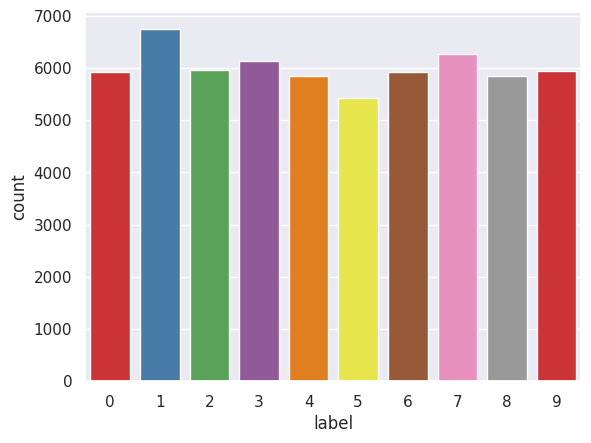

In [7]:
# Exploring the class distribution (almost equally distributed)

sns.set(style="darkgrid")
counts = sns.countplot(x="label", data=train, palette="Set1")

In [8]:
# Normalizing data .. Normilization was found better in this dataset than Standardization
# Normilization between (0, 1) was tested vs (-1, 1) and (-1, 1) showed better results

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [ ]:
# # Finding best gamma and C for RBF kernel (not recommended to re-run as it consumes too much time)
# # Result: gamma =  0.00728932024638, C = 2.82842712475

# %%time

# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV

# # C_range = np.logspace(-2, 2, 10)
# # gamma_range = np.logspace(-2, 2, 10)
# # param_grid = dict(gamma=gamma_range, C=C_range)

# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#           'gamma': [0.0001, 0.001, 0.01, 0.1],
#           'kernel':['linear','rbf'] }
# cv = StratifiedShuffleSplit(test_size=0.2, random_state=42)
# grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
# grid.fit(normalized_X_train, y_train)

# print("The best parameters are %s with a score of %0.2f"
#       % (grid.best_params_, grid.best_score_))

![alt text](https://scikit-learn.org/dev/_images/sphx_glr_plot_rbf_parameters_002.png)


```
The best parameters are {'C': 2.82842712475, 'gamma': 0.00728932024638} with a score of 0.97
```



In [9]:
# Dimensionality Reduction with PCA (Principal Component Analysis)

pca = PCA(n_components=0.3)
pca_X_train = pca.fit_transform(normalized_X_train)
pca_X_test = pca.transform(normalized_X_test)
print(f'{pca.explained_variance_} \n Number of PCA Vectors = {len(pca.explained_variance_)}' )

[20.46749228 14.96556378 13.01083442 11.36648413 10.2684713 ] 
 Number of PCA Vectors = 5


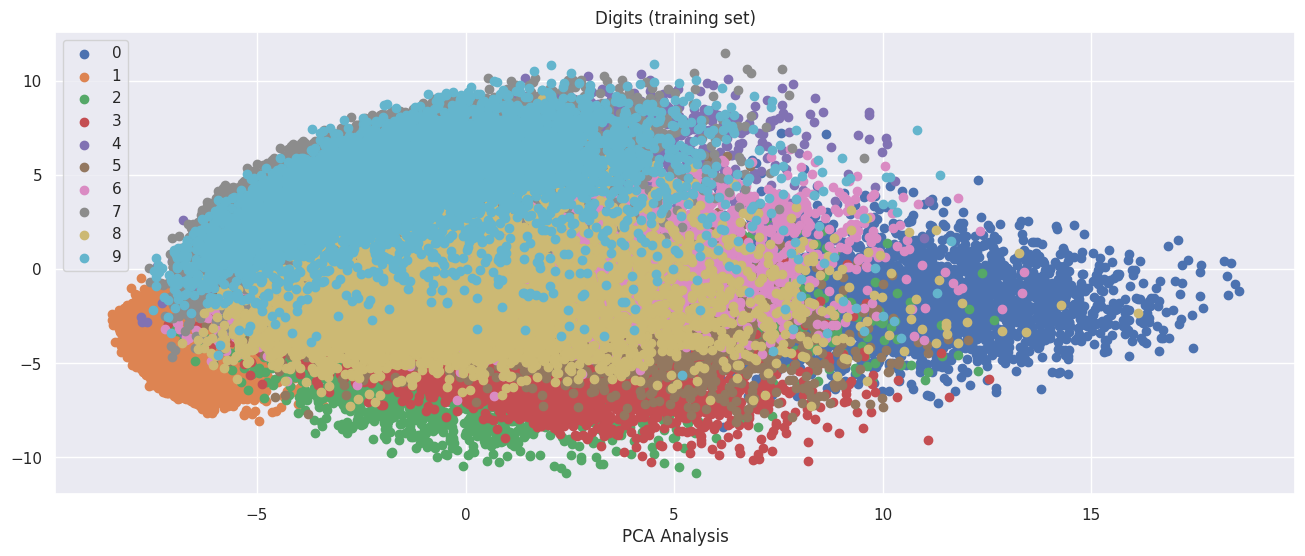

In [10]:
# Plotting PCA output
f, ax = plt.subplots(1, 1)
for i in range(10):
  ax.scatter(pca_X_train[y_train == i, 0], pca_X_train[y_train == i, 1], label=i)
ax.set_xlabel("PCA Analysis")
ax.legend()
f.set_size_inches(16, 6)
ax.set_title("Digits (training set)")
plt.show()

In [11]:
# Trainging the SVC model with gamma and C found in previous step

#classifier = svm.SVC(gamma=0.00728932024638, C=2.82842712475)
classifier = svm.SVC(gamma=0.001, C=2.0)
classifier.fit(pca_X_train, y_train)

# Calculating the training accuracy (to measure the bias)
train_accuracy = classifier.score(pca_X_train, y_train)
print (f"Training Accuracy: {train_accuracy*100:.3f}%")

# Getting predictions
predictions = classifier.predict(pca_X_test)

Training Accuracy: 73.502%


In [ ]:
print(predictions)

train_accuracy = classifier.score(pca_X_train, y_train)

[7 2 1 ... 9 5 2]


In [ ]:
# Saving predictions to a .csv file to be submitted on Kaggle for calculating
# the testing accuracy (in terms of how many correct classifications)

ImageId = [i+1 for i in range(len(predictions))]
submission = pd.DataFrame({'ImageId':ImageId,'Label':(predictions)})
filename = 'Digit Recognizer - SVM.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)
submission.head()

Saved file: Digit Recognizer - SVM.csv


,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4


Kaggle Submission Result:

<a href="https://drive.google.com/uc?export=view&id=16n-tsBjTTB4ahl2S2G8cRV-kjgKjdlJ7"><img src="https://drive.google.com/uc?export=view&id=16n-tsBjTTB4ahl2S2G8cRV-kjgKjdlJ7" style="width: 500px; max-width: 100%; height: auto" title="Click for the larger version." /></a>
[Leaderboard Link](https://www.kaggle.com/c/digit-recognizer/leaderboard#score)

*   Test Accuracy Before PCA = 98.314%
*   Test Accuracy After PCA = 98.414%


